# 연관분석(장바구니 분석)
- https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=gkenq&logNo=10188110816
- https://wikidocs.net/123595 

In [39]:
# 로컬
# !pip install mlxtend

In [40]:
import pandas as pd

In [41]:
dataset=[['사과','치즈','생수'],
               ['생수','호두','치즈','고등어'],
               ['수박','사과','생수'],
               ['생수','호두','치즈','옥수수']]

In [42]:
##############################
##   dataset의 고유값 추출
##  파이썬의 extend로도 리스트 연결가능함.
################################
# 직접 구현
import numpy as np

tmp = []
for x in dataset:
    for k in x:
        tmp.append(k)
        
np.unique(tmp)

array(['고등어', '사과', '생수', '수박', '옥수수', '치즈', '호두'], dtype='<U3')

In [43]:
## 직접 df 만들기
items = np.unique(tmp)
result = []
for data in dataset:
    list = ['True' if x in data else 'False' for x in items]
    result.append(list)
result
pd.DataFrame(result, columns=items)

,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


In [44]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori # 연관분석 패키지

In [45]:
# TransactionEncoder 사용
te = TransactionEncoder()
te.fit(dataset)
te.columns_

['고등어', '사과', '생수', '수박', '옥수수', '치즈', '호두']

In [46]:
te_ary = te.fit(dataset).transform(dataset)
te_ary

array([[False,  True,  True, False, False,  True, False],
       [ True, False,  True, False, False,  True,  True],
       [False,  True,  True,  True, False, False, False],
       [False, False,  True, False,  True,  True,  True]])

In [47]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


## 지지도, 신뢰도, 향상도 구하기

In [48]:
# 나중에 for문으로 직접 구현해보기
# min_support 옵션설정하지 않으면 지지도가 기본 0.5 이상값이 나옴
frequent_itemsets = apriori(df,use_colnames=True)
print(frequent_itemsets)

   support      itemsets
0     0.50          (사과)
1     1.00          (생수)
2     0.75          (치즈)
3     0.50          (호두)
4     0.50      (생수, 사과)
5     0.75      (치즈, 생수)
6     0.50      (호두, 생수)
7     0.50      (호두, 치즈)
8     0.50  (호두, 치즈, 생수)


In [49]:
 # 아래작업은 모든 경우의 수를 다 보여줌
 apriori(df,min_support=0.01,use_colnames=True)

,support,itemsets
0,0.25,(고등어)
1,0.50,(사과)
2,1.00,(생수)
3,0.25,(수박)
4,0.25,(옥수수)
5,0.75,(치즈)
6,0.50,(호두)
7,0.25,"(고등어, 생수)"
8,0.25,"(고등어, 치즈)"
9,0.25,"(고등어, 호두)"


In [50]:
frequent_itemsets = apriori(df,min_support=0.01,use_colnames=True)
frequent_itemsets['itemsets']

0                 (고등어)
1                  (사과)
2                  (생수)
3                  (수박)
4                 (옥수수)
5                  (치즈)
6                  (호두)
7             (고등어, 생수)
8             (고등어, 치즈)
9             (고등어, 호두)
10             (생수, 사과)
11             (수박, 사과)
12             (치즈, 사과)
13             (수박, 생수)
14            (생수, 옥수수)
15             (치즈, 생수)
16             (호두, 생수)
17            (치즈, 옥수수)
18            (호두, 옥수수)
19             (호두, 치즈)
20        (고등어, 치즈, 생수)
21        (고등어, 호두, 생수)
22        (호두, 고등어, 치즈)
23         (수박, 생수, 사과)
24         (생수, 치즈, 사과)
25        (치즈, 생수, 옥수수)
26        (호두, 생수, 옥수수)
27         (호두, 치즈, 생수)
28        (호두, 치즈, 옥수수)
29    (호두, 고등어, 치즈, 생수)
30    (호두, 치즈, 생수, 옥수수)
Name: itemsets, dtype: object

In [51]:
## 특정갯수 이상의 item만 추출
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x)) 
frequent_itemsets[frequent_itemsets['length'] >=2] 

,support,itemsets,length
7,0.25,"(고등어, 생수)",2
8,0.25,"(고등어, 치즈)",2
9,0.25,"(고등어, 호두)",2
10,0.50,"(생수, 사과)",2
11,0.25,"(수박, 사과)",2
12,0.25,"(치즈, 사과)",2
13,0.25,"(수박, 생수)",2
14,0.25,"(생수, 옥수수)",2
15,0.75,"(치즈, 생수)",2
16,0.50,"(호두, 생수)",2


In [52]:
# # 특정 아이템(치즈)이 포함된 것만 추출
frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: '치즈' in x)] 

,support,itemsets,length
5,0.75,(치즈),1
8,0.25,"(고등어, 치즈)",2
12,0.25,"(치즈, 사과)",2
15,0.75,"(치즈, 생수)",2
17,0.25,"(치즈, 옥수수)",2
19,0.50,"(호두, 치즈)",2
20,0.25,"(고등어, 치즈, 생수)",3
22,0.25,"(호두, 고등어, 치즈)",3
24,0.25,"(생수, 치즈, 사과)",3
25,0.25,"(치즈, 생수, 옥수수)",3


In [53]:
from mlxtend.frequent_patterns import apriori,association_rules

# metric 에는 지지도(support), 신뢰도(confidence), 향상도(lift) 사용가능
# 값의 최소옵션은 min_threshold에 기입함.

rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.0)
rules
# association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
# antecedents(A), consequents(B)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(고등어),(생수),0.25,1.00,0.25,1.000000,1.000000,0.0000,inf
1,(생수),(고등어),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
2,(고등어),(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf
3,(치즈),(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
4,(고등어),(호두),0.25,0.50,0.25,1.000000,2.000000,0.1250,inf
...,...,...,...,...,...,...,...,...,...
103,"(생수, 옥수수)","(호두, 치즈)",0.25,0.50,0.25,1.000000,2.000000,0.1250,inf
104,(호두),"(치즈, 생수, 옥수수)",0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500
105,(치즈),"(호두, 생수, 옥수수)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
106,(생수),"(옥수수, 호두, 치즈)",1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000


In [54]:
# 향상도는 1이상이어야 연관성이 있음
# B값이 A값에 연관도가 높을수록 향상도가 커짐(한 트랜잭션에 동시에 있을수록)
# 아래에서는 A가 antecedents, B가 consequents 임.

# confidence는 A가 B에 종속됨의 정도, 숫자가 높을수록 종속성이 강함.

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(고등어),(호두),0.25,0.50,0.25,1.0,2.0,0.125,inf
1,(호두),(고등어),0.50,0.25,0.25,0.5,2.0,0.125,1.5
2,(수박),(사과),0.25,0.50,0.25,1.0,2.0,0.125,inf
3,(사과),(수박),0.50,0.25,0.25,0.5,2.0,0.125,1.5
4,(호두),(옥수수),0.50,0.25,0.25,0.5,2.0,0.125,1.5
5,(옥수수),(호두),0.25,0.50,0.25,1.0,2.0,0.125,inf
6,"(고등어, 생수)",(호두),0.25,0.50,0.25,1.0,2.0,0.125,inf
7,"(호두, 생수)",(고등어),0.50,0.25,0.25,0.5,2.0,0.125,1.5
8,(고등어),"(호두, 생수)",0.25,0.50,0.25,1.0,2.0,0.125,inf
9,(호두),"(고등어, 생수)",0.50,0.25,0.25,0.5,2.0,0.125,1.5


In [55]:
# lift값이 가장 큰 값
rules[rules.antecedents == {'호두'}].sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(호두),(고등어),0.5,0.25,0.25,0.5,2.0,0.125,1.5
4,(호두),(옥수수),0.5,0.25,0.25,0.5,2.0,0.125,1.5
9,(호두),"(고등어, 생수)",0.5,0.25,0.25,0.5,2.0,0.125,1.5
12,(호두),"(고등어, 치즈)",0.5,0.25,0.25,0.5,2.0,0.125,1.5
20,(호두),"(생수, 옥수수)",0.5,0.25,0.25,0.5,2.0,0.125,1.5
24,(호두),"(치즈, 옥수수)",0.5,0.25,0.25,0.5,2.0,0.125,1.5
32,(호두),"(고등어, 치즈, 생수)",0.5,0.25,0.25,0.5,2.0,0.125,1.5
40,(호두),"(치즈, 생수, 옥수수)",0.5,0.25,0.25,0.5,2.0,0.125,1.5


In [56]:
# 특정단어가 있는 자료 찾기,위에서 한 내용임
rules[rules.antecedents.apply(lambda x: '생수' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,"(고등어, 생수)",(호두),0.25,0.50,0.25,1.0,2.0,0.125,inf
7,"(호두, 생수)",(고등어),0.50,0.25,0.25,0.5,2.0,0.125,1.5
14,"(수박, 생수)",(사과),0.25,0.50,0.25,1.0,2.0,0.125,inf
15,"(사과, 생수)",(수박),0.50,0.25,0.25,0.5,2.0,0.125,1.5
18,"(호두, 생수)",(옥수수),0.50,0.25,0.25,0.5,2.0,0.125,1.5
19,"(생수, 옥수수)",(호두),0.25,0.50,0.25,1.0,2.0,0.125,inf
26,"(호두, 생수, 치즈)",(고등어),0.50,0.25,0.25,0.5,2.0,0.125,1.5
27,"(고등어, 치즈, 생수)",(호두),0.25,0.50,0.25,1.0,2.0,0.125,inf
29,"(호두, 생수)","(고등어, 치즈)",0.50,0.25,0.25,0.5,2.0,0.125,1.5
31,"(고등어, 생수)","(호두, 치즈)",0.25,0.50,0.25,1.0,2.0,0.125,inf


In [57]:
# 로컬
# !pip install networkx
# !pip install matplotlib

In [58]:
!pip install apyori > /dev/null

In [59]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(고등어),(호두),0.25,0.50,0.25,1.0,2.0,0.125,inf
1,(호두),(고등어),0.50,0.25,0.25,0.5,2.0,0.125,1.5
2,(수박),(사과),0.25,0.50,0.25,1.0,2.0,0.125,inf
3,(사과),(수박),0.50,0.25,0.25,0.5,2.0,0.125,1.5
4,(호두),(옥수수),0.50,0.25,0.25,0.5,2.0,0.125,1.5
5,(옥수수),(호두),0.25,0.50,0.25,1.0,2.0,0.125,inf
6,"(고등어, 생수)",(호두),0.25,0.50,0.25,1.0,2.0,0.125,inf
7,"(호두, 생수)",(고등어),0.50,0.25,0.25,0.5,2.0,0.125,1.5
8,(고등어),"(호두, 생수)",0.25,0.50,0.25,1.0,2.0,0.125,inf
9,(호두),"(고등어, 생수)",0.50,0.25,0.25,0.5,2.0,0.125,1.5


In [60]:
from apyori import apriori
result = apriori(dataset, min_support=0.01)
df = pd.DataFrame(result)
df[:5]

,items,support,ordered_statistics
0,(고등어),0.25,"[((), (고등어), 0.25, 1.0)]"
1,(사과),0.50,"[((), (사과), 0.5, 1.0)]"
2,(생수),1.00,"[((), (생수), 1.0, 1.0)]"
3,(수박),0.25,"[((), (수박), 0.25, 1.0)]"
4,(옥수수),0.25,"[((), (옥수수), 0.25, 1.0)]"


In [61]:
# 글자길이
df['length']=df['items'].apply(lambda x: len(x))
df[:5]

,items,support,ordered_statistics,length
0,(고등어),0.25,"[((), (고등어), 0.25, 1.0)]",1
1,(사과),0.50,"[((), (사과), 0.5, 1.0)]",1
2,(생수),1.00,"[((), (생수), 1.0, 1.0)]",1
3,(수박),0.25,"[((), (수박), 0.25, 1.0)]",1
4,(옥수수),0.25,"[((), (옥수수), 0.25, 1.0)]",1


In [62]:
# 필수는 아닌것 같음
df=df[(df['length']==2) & (df['support']>=0.01)].sort_values(by='support',ascending=False)
df.head(10)

,items,support,ordered_statistics,length
15,"(치즈, 생수)",0.75,"[((), (치즈, 생수), 0.75, 1.0), ((생수), (치즈), 0.75,...",2
10,"(생수, 사과)",0.50,"[((), (사과, 생수), 0.5, 1.0), ((사과), (생수), 1.0, 1...",2
16,"(호두, 생수)",0.50,"[((), (호두, 생수), 0.5, 1.0), ((생수), (호두), 0.5, 1...",2
19,"(호두, 치즈)",0.50,"[((), (호두, 치즈), 0.5, 1.0), ((치즈), (호두), 0.6666...",2
7,"(고등어, 생수)",0.25,"[((), (고등어, 생수), 0.25, 1.0), ((고등어), (생수), 1.0...",2
8,"(고등어, 치즈)",0.25,"[((), (고등어, 치즈), 0.25, 1.0), ((고등어), (치즈), 1.0...",2
9,"(고등어, 호두)",0.25,"[((), (고등어, 호두), 0.25, 1.0), ((고등어), (호두), 1.0...",2
11,"(수박, 사과)",0.25,"[((), (수박, 사과), 0.25, 1.0), ((사과), (수박), 0.5, ...",2
12,"(치즈, 사과)",0.25,"[((), (치즈, 사과), 0.25, 1.0), ((사과), (치즈), 0.5, ...",2
13,"(수박, 생수)",0.25,"[((), (수박, 생수), 0.25, 1.0), ((생수), (수박), 0.25,...",2


In [63]:
## 이건 내 자료로 해보고 있음.
r=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.0)
tmp=pd.DataFrame(r)
display(tmp[:5])

tmp['length']=tmp['antecedents'].apply(lambda x: len(x))
tmp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(고등어),(생수),0.25,1.00,0.25,1.000000,1.000000,0.0000,inf
1,(생수),(고등어),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
2,(고등어),(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf
3,(치즈),(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
4,(고등어),(호두),0.25,0.50,0.25,1.000000,2.000000,0.1250,inf


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,(고등어),(생수),0.25,1.00,0.25,1.000000,1.000000,0.0000,inf,1
1,(생수),(고등어),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000,1
2,(고등어),(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf,1
3,(치즈),(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125,1
4,(고등어),(호두),0.25,0.50,0.25,1.000000,2.000000,0.1250,inf,1
...,...,...,...,...,...,...,...,...,...,...
103,"(생수, 옥수수)","(호두, 치즈)",0.25,0.50,0.25,1.000000,2.000000,0.1250,inf,2
104,(호두),"(치즈, 생수, 옥수수)",0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500,1
105,(치즈),"(호두, 생수, 옥수수)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125,1
106,(생수),"(옥수수, 호두, 치즈)",1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000,1


In [64]:
import networkx as nx
G=nx.Graph()
ar=(df['items']); G.add_edges_from(ar)
ar

15     (치즈, 생수)
10     (생수, 사과)
16     (호두, 생수)
19     (호두, 치즈)
7     (고등어, 생수)
8     (고등어, 치즈)
9     (고등어, 호두)
11     (수박, 사과)
12     (치즈, 사과)
13     (수박, 생수)
14    (생수, 옥수수)
17    (치즈, 옥수수)
18    (호두, 옥수수)
Name: items, dtype: object

In [65]:
G1=nx.Graph()
ar1=tmp['antecedents']; G1.add_edges_from(ar)
ar1

0          (고등어)
1           (생수)
2          (고등어)
3           (치즈)
4          (고등어)
         ...    
103    (생수, 옥수수)
104         (호두)
105         (치즈)
106         (생수)
107        (옥수수)
Name: antecedents, Length: 108, dtype: object

In [66]:
pr=nx.pagerank(G)
nsize=np.array([v for v in pr.values()])
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))
nsize

array([1450.1405505 , 2000.        ,  506.37981884,  933.20920045,
        429.68501826,    0.        ,  429.68501826])

In [67]:
pos=nx.planar_layout(G1)
pos

{'고등어': array([ 0.70731707, -0.36585366]),
 '사과': array([-0.31707317,  0.31707317]),
 '생수': array([0.19512195, 0.14634146]),
 '수박': array([-0.14634146,  0.48780488]),
 '옥수수': array([ 0.19512195, -0.02439024]),
 '치즈': array([-1.        , -0.36585366]),
 '호두': array([ 0.36585366, -0.19512195])}

In [68]:
!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
!mv malgun.ttf /usr/share/fonts/truetype/
import matplotlib.font_manager as fm 
fm._rebuild() 

--2021-09-27 03:06:39--  https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9595100 (9.2M) [application/octetstream]
Saving to: ‘malgun.ttf’

malgun.ttf          100%[===================>]   9.15M  1.84MB/s    in 5.0s    

2021-09-27 03:06:45 (1.84 MB/s) - ‘malgun.ttf’ saved [9595100/9595100]



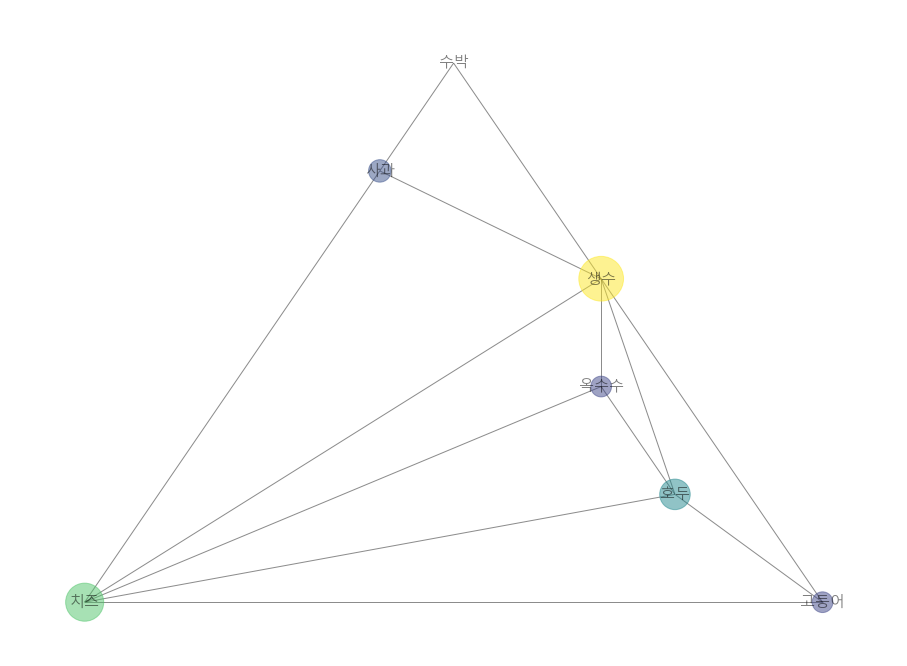

In [76]:
# 한글폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = "/usr/share/fonts/truetype/malgun.ttf"
plt.figure(figsize=(16,12)); plt.axis('off')
fname = fm.FontProperties(fname=font_path).get_name()


#alpha값이 1이면 투명도 없음. 동그라미(노드)안의 글자의 투명도가 없음.
#0에 가까울수록 투명해지면서 아래의 선이 같이 표시됨

#edge_color='1' 이면 선색상 안나옴. 
#camp=plt.cm.YlGN 은 전체 색상톤

pr_values_list = [x for x in pr.values()]

nx.draw_networkx(G, pos=pos, node_color=pr_values_list, node_size=nsize,
                 alpha=0.5, edge_color='0.1', #cmap=plt.cm.YlGn,
                 font_family=fname,font_size=15)